In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pymongo import MongoClient

## import data

In [4]:
client = MongoClient("mongodb://localhost:27017/")
db = client['diabetes']
collection = db['pasien']

# Ambil data dari MongoDB
data = pd.DataFrame(list(collection.find()))

# Cek data yang diambil
print(data.head())

                        _id  Pregnancies  Glucose  BloodPressure  \
0  67fc940cf47e1a8b442935b0            6      148             72   
1  67fc940cf47e1a8b442935b1            1       85             66   
2  67fc940cf47e1a8b442935b2            8      183             64   
3  67fc940cf47e1a8b442935b3            1       89             66   
4  67fc940cf47e1a8b442935b4            0      137             40   

   SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome  
0             35        0  33.6                     0.627   50        1  
1             29        0  26.6                     0.351   31        0  
2              0        0  23.3                     0.672   32        1  
3             23       94  28.1                     0.167   21        0  
4             35      168  43.1                     2.288   33        1  


### 3. Data Understanding

In [8]:
# Shape
print("Jumlah baris dan kolom:", data.shape)

# Tipe data per kolom
print("\nTipe data:")
print(data.dtypes)

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(data.describe(include='all'))

# Cek missing values
print("\nMissing values:")
print(data.isnull().sum())

# Cek duplikasi
print("\nJumlah duplikat:", data.duplicated().sum())


Jumlah baris dan kolom: (768, 10)

Tipe data:
_id                          object
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Statistik deskriptif:
                             _id  Pregnancies     Glucose  BloodPressure  \
count                        768   768.000000  768.000000     768.000000   
unique                       768          NaN         NaN            NaN   
top     67fc940cf47e1a8b4429389f          NaN         NaN            NaN   
freq                           1          NaN         NaN            NaN   
mean                         NaN     3.845052  120.894531      69.105469   
std                          NaN     3.369578   31.972618      19.355807   
min                      

### 4. Data Cleaning

In [11]:
data.isnull().sum()

_id                         0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Glucose'] < (Q1 - 1.5 * IQR)) | (data['Glucose'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outlier Glucose: {len(outliers)}")

data = data[~((data['Glucose'] < (Q1 - 1.5 * IQR)) | (data['Glucose'] > (Q3 + 1.5 * IQR)))]


Jumlah outlier Glucose: 5


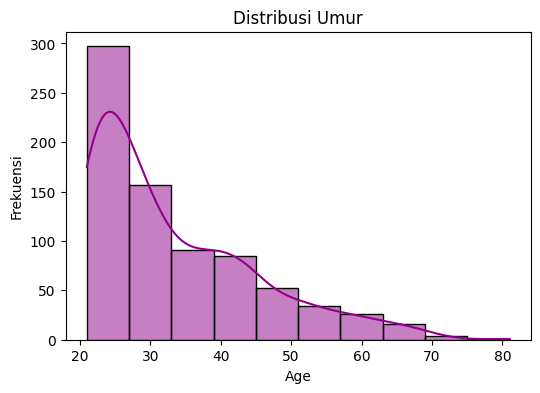

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Umur')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

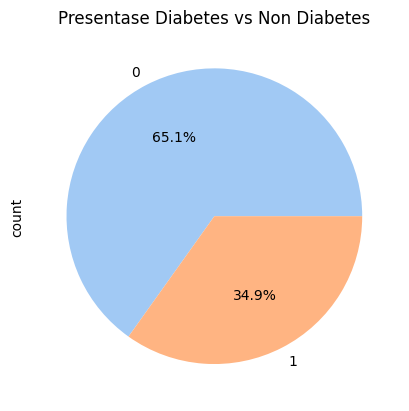

In [23]:
sns.set_palette('pastel')
data['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes vs Non Diabetes')
plt.show()

C:\Users\Mega Global\AppData\Local\Temp\ipykernel_6820\3796736778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Outcome', palette='rocket')


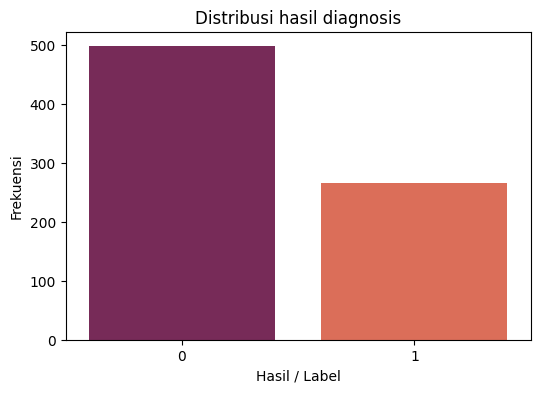

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome', palette='rocket')

plt.title('Distribusi hasil diagnosis')
plt.xlabel('Hasil / Label')
plt.ylabel('Frekuensi')
plt.show()


In [28]:
data.corr()

TypeError: float() argument must be a string or a real number, not 'ObjectId'